In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
from matplotlib import pyplot as plt
import tikzplotlib
import sys
import json

In [93]:
final_log = {}
for method in os.listdir("./hz-bc-tyc_1"):
    final_log[method] = pickle.load(open('./hz-bc-tyc_1/%s/log.pkl' % method, 'rb'))[-1]

In [94]:
metrics = ['avg_speed', 'travel_time', 'waiting_time', 'fuel_consumption', 'CO_emission', 'CO2_emission']

In [95]:
def change_name_method(method):
    if method == 'MaxPressure':
        return 'MP'
    if method == 'IntelliLight':
        return 'IntelliL'
    if method == 'FixedTime':
        return 'FT'
    return method

In [96]:
data = pd.DataFrame(columns=['method'] + metrics)
for k, v in final_log.items():
    veh_logs = v['veh_logs']
    for log in veh_logs:        
        row = {
            'method': change_name_method(k),
            'avg_speed': log['avg_speed'],
            'travel_time': log['travel_time'],
            'waiting_time': log['waiting_time'],
            'fuel_consumption': log['fuel_consumption'],
            'CO_emission': log['CO_emission'] / 1000000,
            'CO2_emission': log['CO2_emission'] / 1000000,
        }
        data = data.append(row, ignore_index=True)

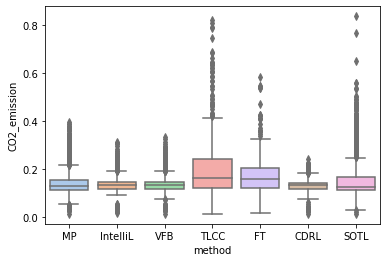

In [102]:
sns.boxplot(x="method", y='CO2_emission', data=data, palette="pastel")
tikzplotlib.save("test1.tex")

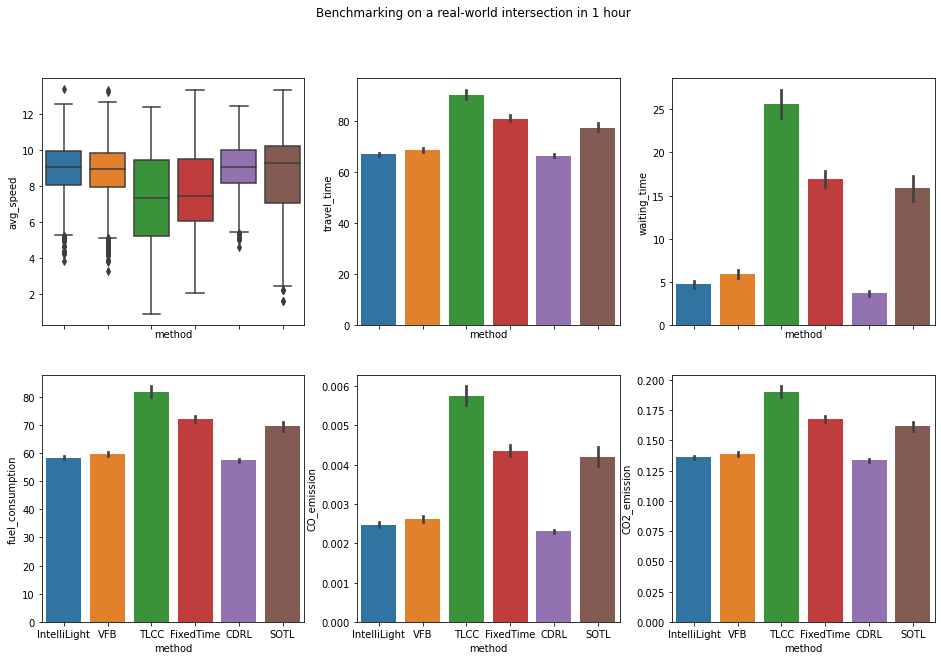

In [31]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,10))
fig.suptitle('Benchmarking on a real-world intersection in 1 hour')
sns.boxplot(ax=axes[0, 0], x="method", y='avg_speed', data=data)
sns.barplot(ax=axes[0, 1], x="method", y='travel_time', data=data)
sns.barplot(ax=axes[0, 2], x="method", y='waiting_time', data=data)
sns.barplot(ax=axes[1, 0], x="method", y='fuel_consumption', data=data)
sns.barplot(ax=axes[1, 1], x="method", y='CO_emission', data=data)
sns.barplot(ax=axes[1, 2], x="method", y='CO2_emission', data=data)
plt.savefig('output.svg')

In [156]:
final_log = {}
for method in os.listdir("./atlanta/"):
    final_log[method] = pickle.load(open('./atlanta/%s/log.pkl' % method, 'rb'))[-1]

In [155]:
data = pd.DataFrame(columns=['method', 'step', 'intersection', 'waiting_time'])
avg_speed = 0
for method in os.listdir("./atlanta/"):
    for intersection in range(len(final_log[method]['tf_logs'])):
        for k, v in final_log[method]['tf_logs'][intersection].items():
            if k == 'lanes':
                continue
            w = np.mean(v['waiting_time'])
            if w < 0:
                print("???")
            data = data.append({
                'method': method,
                'intersection': intersection,
                'step': k,
                'waiting_time': w
            }, ignore_index=True)

SystemExit: 0

/home/vtoan/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3435: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [161]:
vehs_loaded = json.load(open('./atlanta/flow.json'))

In [167]:
route = ["-354587521#1", "-631653294#2", "-354587522#9", "-354587522#6", "-354587522#2", "-629278174#1"]
veh_ids_same_route = []
for idx, veh in enumerate(vehs_loaded[1:]):
    if veh['route'] == route:
        veh_ids_same_route.append(idx)

In [ ]:
final_log['CDRL']

In [ ]:
data = pd.DataFrame(columns=['method', 'step', 'intersection', 'waiting_time'])
avg_speed = 0
for method in os.listdir("./atlanta/"):
    for intersection in range(len(final_log[method]['tf_logs'])):
    

In [151]:
final_log['FixedTime']['veh_logs'][0]

{'avg_speed_per_step': 6.833066140060014,
 'CO2_emission': 280896.7841571538,
 'CO_emission': 8510.787401555886,
 'fuel_consumption': 120.74880948305041,
 'waiting_time': 41.0,
 'distance': 876.4655320677415,
 'travel_time': 129.0,
 'avg_speed': 6.7943064501375305,
 'finished': True}

In [50]:
for i in range(5):
    print(final_log['IntelliLight']['tf_logs'][i]['lanes'])

['-290405874#2_0', '-290405874#2_1', '-354587522#2_0', '-354587522#2_1', '290405872#0_0', '290405872#0_1', '354587523_0', '354587523_1']
['-9247806#2_0', '-354587522#6_0', '-354587522#6_1', '354587522#0_0', '354587522#0_1']
['354587522#3_0', '354587522#3_1', '-611582485#3_0', '-354587522#9_0', '-354587522#9_1', '9258925#0_0']
['354587522#7_0', '354587522#7_1', '-198659569#3_0', '-631653294#2_0', '-631653294#2_1', '9246225#4_0']
['631653294#0_0', '631653294#0_1', '-505912698#0_0', '-505912698#0_1', '-354587521#1_0', '-354587521#1_1', '-234013266#1_0', '-234013266#1_1']


In [54]:
for i in range(5):
    print(final_log['FixedTime']['tf_logs'][i]['lanes'])

['-290405874#2_0', '-290405874#2_1', '-354587522#2_0', '-354587522#2_1', '290405872#0_0', '290405872#0_1', '354587523_0', '354587523_1']
['-9247806#2_0', '-354587522#6_0', '-354587522#6_1', '354587522#0_0', '354587522#0_1']
['354587522#3_0', '354587522#3_1', '-611582485#3_0', '-354587522#9_0', '-354587522#9_1', '9258925#0_0']
['354587522#7_0', '354587522#7_1', '-198659569#3_0', '-631653294#2_0', '-631653294#2_1', '9246225#4_0']
['631653294#0_0', '631653294#0_1', '-505912698#0_0', '-505912698#0_1', '-354587521#1_0', '-354587521#1_1', '-234013266#1_0', '-234013266#1_1']


In [90]:
for i in range(5):
    print(i, np.mean(data[(data['method'] == 'IntelliLight') & (data['intersection'] == i)]['waiting_time']))
    print(i, np.mean(data[(data['method'] == 'TLCC') & (data['intersection'] == i)]['waiting_time']))
    print(i, np.mean(data[(data['method'] == 'MaxPressure') & (data['intersection'] == i)]['waiting_time']))

0 8.823759791122715
0 149.98642361111112
0 11.11161991986262
1 0.7012184508268058
1 129.75527777777776
1 2.744247281053234
2 0.8064984044096316
2 214.1277314814815
2 8.59292119824461
3 3.7975776037133735
3 126.42263888888888
3 7.31845067735165
4 247.95001087902523
4 288.0262847222222
4 18.88544647967945


In [132]:
# sns.color_palette("Set2")
sns.catplot(
    data=data, kind="bar", x="intersection", y="waiting_time", hue="method",ci=None,
    palette='Set1_r'
)

import tikzplotlib

tikzplotlib.save("atlanta.tex")

ValueError: Could not interpret input 'travel_time'